In [1]:
import pandas as pd
import io

# Read Excel file
df_raw = pd.read_excel("output\maize_file.xlsx", header=None)

# Check the first row
raw_text = df_raw.iloc[:, 0].str.cat(sep='\n')  # Join all lines

# Now treat it as CSV-style text
df = pd.read_csv(io.StringIO(raw_text))

# Save to clean CSV
df.to_csv("output\maize_cleaned_data.csv", index=False)

# Preview
print(df.head())

   Year Field-Location State          City  \
0  2022           COH1    CO  Fort Collins   
1  2022           COH1    CO  Fort Collins   
2  2022           COH1    CO  Fort Collins   
3  2022           COH1    CO  Fort Collins   
4  2022           COH1    CO  Fort Collins   

   Plot length (center-center in feet)  Plot area (ft2)  \
0                                   20            89.25   
1                                   20            89.25   
2                                   20            89.25   
3                                   20            89.25   
4                                   20            89.25   

   Alley length (in inches)  Row spacing (in inches)  Rows per plot  \
0                        36                     31.5              2   
1                        36                     31.5              2   
2                        36                     31.5              2   
3                        36                     31.5              2   
4            

In [2]:
print(df.columns.tolist())


['Year', 'Field-Location', 'State', 'City', 'Plot length (center-center in feet)', 'Plot area (ft2)', 'Alley length (in inches)', 'Row spacing (in inches)', 'Rows per plot', '# Seed per plot', 'Experiment', 'Pedigree', 'Family', 'Tester', 'Replicate', 'Block', 'Plot', 'Plot_ID', 'Range', 'Pass', 'Date Plot Planted [MM/DD/YY]', 'Date Plot Harvested [MM/DD/YY]', 'Anthesis [MM/DD/YY]', 'Silking [MM/DD/YY]', 'Anthesis [days]', 'Silking [days]', 'Plant Height [cm]', 'Ear Height [cm]', 'Stand Count [# of plants]', 'Root Lodging [# of plants]', 'Stalk Lodging [# of plants]', 'Grain Moisture [%]', 'Test Weight [lbs]', 'Plot Weight [lbs]', 'Grain Yield (bu/A)', "Plot Discarded [enter 'yes' or blank]", 'Comments', 'Filler', 'Snap [# of plants]']


In [3]:

# Step 1: Load the Excel file without headers
df_raw = pd.read_excel("output\maize_file.xlsx", header=None)

# Step 2: Extract and split header
raw_header = df_raw.iloc[0, 0]  # single string with all column names
columns = [col.strip().replace('"', '') for col in raw_header.split(",")]

# Step 3: Process data rows (start from second row, split by commas)
data_rows = df_raw.iloc[1:, 0].str.split(",", expand=True)
data_rows.columns = columns

# Step 4: Optional - convert numeric columns (like Grain Yield)
data_rows["Grain Yield (bu/A)"] = pd.to_numeric(data_rows["Grain Yield (bu/A)"], errors='coerce')

# Step 5: Save cleaned file
data_rows.to_csv("output\maize_cleaned_data.csv", index=False)

# Check first few rows
print(data_rows.head())


   Year Field-Location State            City  \
1  2022         "COH1"  "CO"  "Fort Collins"   
2  2022         "COH1"  "CO"  "Fort Collins"   
3  2022         "COH1"  "CO"  "Fort Collins"   
4  2022         "COH1"  "CO"  "Fort Collins"   
5  2022         "COH1"  "CO"  "Fort Collins"   

  Plot length (center-center in feet) Plot area (ft2)  \
1                                  20           89.25   
2                                  20           89.25   
3                                  20           89.25   
4                                  20           89.25   
5                                  20           89.25   

  Alley length (in inches) Row spacing (in inches) Rows per plot  \
1                       36                    31.5             2   
2                       36                    31.5             2   
3                       36                    31.5             2   
4                       36                    31.5             2   
5                       36  

In [4]:

# Step 1: Load the Excel file without headers
df_raw = pd.read_excel("output\maize_file.xlsx", header=None)

# Step 2: Extract and split header
raw_header = df_raw.iloc[0, 0]  # single string with all column names
columns = [col.strip().replace('"', '') for col in raw_header.split(",")]

# Step 3: Process data rows (start from second row, split by commas)
data_rows = df_raw.iloc[1:, 0].str.split(",", expand=True)
data_rows.columns = columns

# Step 4: Optional - convert numeric columns (like Grain Yield)
data_rows["Grain Yield (bu/A)"] = pd.to_numeric(data_rows["Grain Yield (bu/A)"], errors='coerce')

# Step 5: Save cleaned file
data_rows.to_csv("output\maize_cleaned_data.csv", index=False)

# Check first few rows
print(data_rows.head())


   Year Field-Location State            City  \
1  2022         "COH1"  "CO"  "Fort Collins"   
2  2022         "COH1"  "CO"  "Fort Collins"   
3  2022         "COH1"  "CO"  "Fort Collins"   
4  2022         "COH1"  "CO"  "Fort Collins"   
5  2022         "COH1"  "CO"  "Fort Collins"   

  Plot length (center-center in feet) Plot area (ft2)  \
1                                  20           89.25   
2                                  20           89.25   
3                                  20           89.25   
4                                  20           89.25   
5                                  20           89.25   

  Alley length (in inches) Row spacing (in inches) Rows per plot  \
1                       36                    31.5             2   
2                       36                    31.5             2   
3                       36                    31.5             2   
4                       36                    31.5             2   
5                       36  

## Random Forest Regressor (RandomForestRegressor)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Step 1: Load data
df = pd.read_csv("output\maize_cleaned_data.csv")

# Step 2: Drop non-useful columns
drop_cols = [
    "Year", "Field-Location", "State", "City", "Experiment", "Pedigree",
    "Family", "Tester", "Plot Discarded [enter 'yes' or blank]", "Comments",
    "Filler", "Plot_ID", "Date Plot Planted [MM/DD/YY]",
    "Date Plot Harvested [MM/DD/YY]", "Anthesis [MM/DD/YY]",
    "Silking [MM/DD/YY]"
]
df = df.drop(columns=drop_cols, errors='ignore')

# Step 3: Ensure target is numeric and drop NaNs
df["Grain Yield (bu/A)"] = pd.to_numeric(df["Grain Yield (bu/A)"], errors='coerce')
df = df.dropna(subset=["Grain Yield (bu/A)"])

# Step 4: Feature-target split
X = df.drop(columns=["Grain Yield (bu/A)"])

# Step 5: Keep only numeric columns
X = X.select_dtypes(include=["float64", "int64"]).copy()

# **New Step: Drop columns with all missing values to avoid imputer warnings**
cols_all_missing = ["Root Lodging [# of plants]", "Stalk Lodging [# of plants]", "Snap [# of plants]"]
X = X.drop(columns=cols_all_missing, errors='ignore')

y = df["Grain Yield (bu/A)"]

# Step 6: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 8: Train Random Forest
r_model = RandomForestRegressor(n_estimators=100, random_state=42)
r_model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = r_model.predict(X_test)
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 4))


Mean Squared Error: 216.04
R² Score: 0.7923


In [6]:
import joblib

joblib.dump(r_model, 'output\RandomForestRegressor.joblib')

print("r_model saved successfully.")

r_model saved successfully.


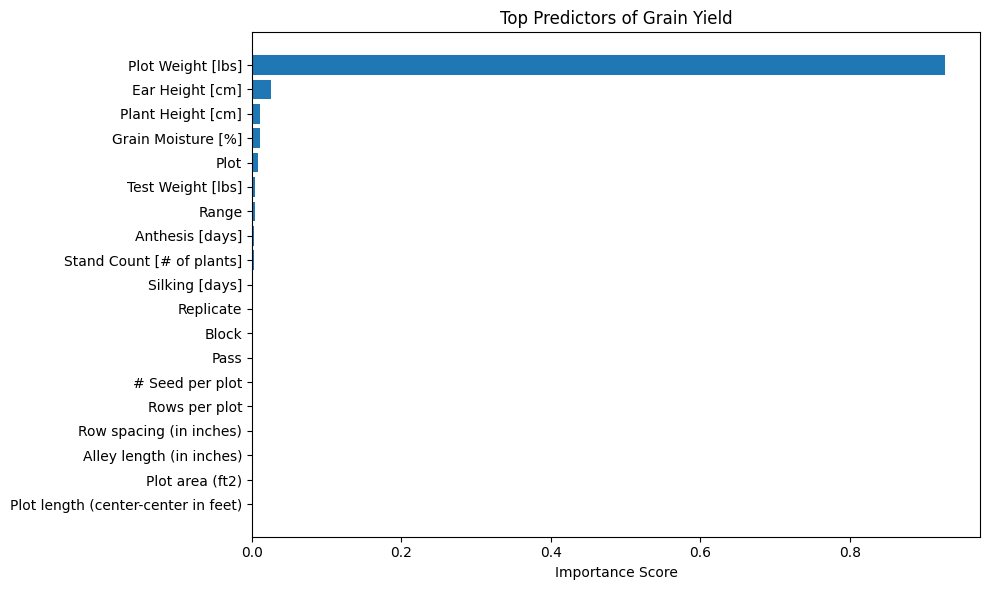

In [7]:
import matplotlib.pyplot as plt
import numpy as np


# Drop columns that still have all NaNs
X = X.dropna(axis=1, how='all')

# Store valid feature names BEFORE imputing
feature_names = X.columns

# Then impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Train model
from sklearn.ensemble import RandomForestRegressor
r_model  = RandomForestRegressor(n_estimators=100, random_state=42)
r_model.fit(X_train, y_train)

# Now plot feature importances using correct feature names
importances = r_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(importances)
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Importance Score")
plt.title("Top Predictors of Grain Yield")
plt.tight_layout()
plt.show()


## Train XGBoost Regressor

In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Load and preprocess data as before
df = pd.read_csv("output\maize_cleaned_data.csv")

drop_cols = [
    "Year", "Field-Location", "State", "City", "Experiment", "Pedigree",
    "Family", "Tester", "Plot Discarded [enter 'yes' or blank]", "Comments",
    "Filler", "Plot_ID", "Date Plot Planted [MM/DD/YY]",
    "Date Plot Harvested [MM/DD/YY]", "Anthesis [MM/DD/YY]",
    "Silking [MM/DD/YY]"
]
df = df.drop(columns=drop_cols, errors='ignore')

df["Grain Yield (bu/A)"] = pd.to_numeric(df["Grain Yield (bu/A)"], errors='coerce')
df = df.dropna(subset=["Grain Yield (bu/A)"])

X = df.drop(columns=["Grain Yield (bu/A)"])
X = X.select_dtypes(include=["float64", "int64"]).copy()

cols_all_missing = ["Root Lodging [# of plants]", "Stalk Lodging [# of plants]", "Snap [# of plants]"]
X = X.drop(columns=cols_all_missing, errors='ignore')

y = df["Grain Yield (bu/A)"]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    objective='reg:squarederror'
)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 4))



Mean Squared Error: 280.55
R² Score: 0.7302


In [9]:
import joblib

joblib.dump(xgb_model, 'output\xgboost_model.joblib')
print("XGBoost model saved successfully.")


XGBoost model saved successfully.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Load and preprocess the data
df = pd.read_csv("output\maize_cleaned_data.csv")

drop_cols = [
    "Year", "Field-Location", "State", "City", "Experiment", "Pedigree",
    "Family", "Tester", "Plot Discarded [enter 'yes' or blank]", "Comments",
    "Filler", "Plot_ID", "Date Plot Planted [MM/DD/YY]",
    "Date Plot Harvested [MM/DD/YY]", "Anthesis [MM/DD/YY]",
    "Silking [MM/DD/YY]"
]
df = df.drop(columns=drop_cols, errors='ignore')

df["Grain Yield (bu/A)"] = pd.to_numeric(df["Grain Yield (bu/A)"], errors='coerce')
df = df.dropna(subset=["Grain Yield (bu/A)"])

X = df.drop(columns=["Grain Yield (bu/A)"])
X = X.select_dtypes(include=["float64", "int64"]).copy()

cols_all_missing = ["Root Lodging [# of plants]", "Stalk Lodging [# of plants]", "Snap [# of plants]"]
X = X.drop(columns=cols_all_missing, errors='ignore')

y = df["Grain Yield (bu/A)"]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 10],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the search
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate
y_pred = best_model.predict(X_test)
print("Tuned Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 2))
print("Tuned R² Score:", round(r2_score(y_test, y_pred), 4))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Tuned Mean Squared Error: 182.31
Tuned R² Score: 0.8247


**Tuning helped reduce error and improve predictive power.**

**learning_rate=0.2, max_depth=5, and n_estimators=100 seem to balance bias-variance well.**

**reg_alpha=0.01 and reg_lambda=0.5 gave light regularization — often ideal for clean, meaningful features.**

## Feature Importance Plot

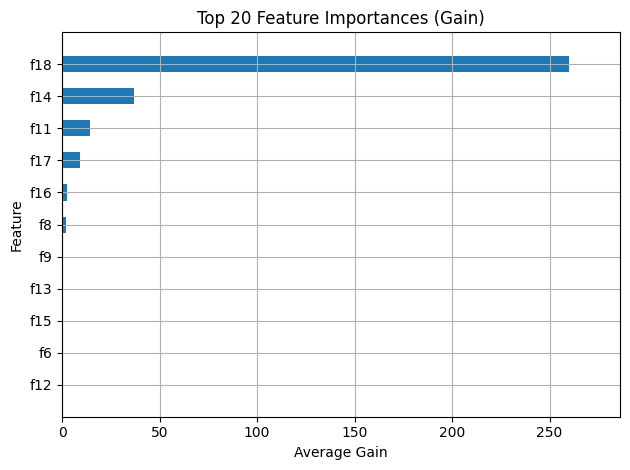

In [11]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Recreate DataFrame version of features used (important for labels)
feature_names = X.columns  # original column names after preprocessing
xgb.plot_importance(best_model, 
                    importance_type='gain',   # You can also try 'weight', 'cover', 'total_gain'
                    max_num_features=20,      # Top 20 features
                    height=0.5,
                    xlabel='Average Gain',
                    show_values=False)
plt.title("Top 20 Feature Importances (Gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [12]:
feature_mapping = {f"f{i}": col for i, col in enumerate(X.columns)}
for f in ["f8", "f11", "f14", "f16", "f17", "f18"]:
    print(f"{f} → {feature_mapping[f]}")



f8 → Plot
f11 → Anthesis [days]
f14 → Ear Height [cm]
f16 → Grain Moisture [%]
f17 → Test Weight [lbs]
f18 → Plot Weight [lbs]


In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Initialize model
xgb_model = XGBRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=3,
                           verbose=1)

grid_search.fit(X_train, y_train)  # make sure X_train and y_train are defined



Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [14]:
best_model = grid_search.best_estimator_


<Figure size 1000x800 with 0 Axes>

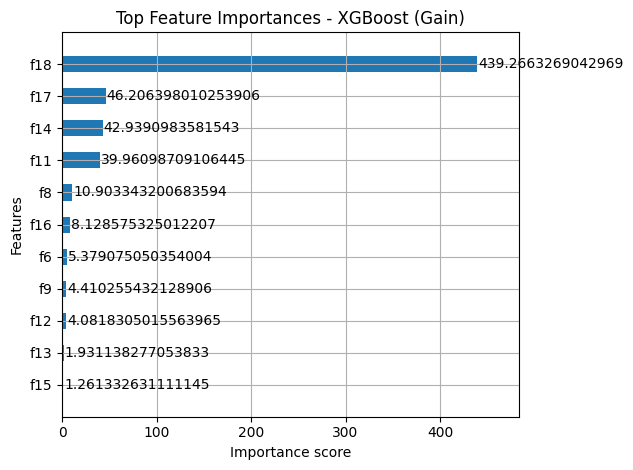

In [15]:
import matplotlib.pyplot as plt
import xgboost as xgb

plt.figure(figsize=(10, 8))
xgb.plot_importance(best_model, 
                    importance_type='gain', 
                    max_num_features=20, 
                    height=0.5,
                    show_values=True)
plt.title('Top Feature Importances - XGBoost (Gain)')
plt.tight_layout()
plt.show()


## SHAP Analysis

**SHAP for xgb_model (XGBoost)**

In [16]:
import shap

from xgboost import XGBRegressor

# This should have been done before
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)



C:\Users\gargi\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

**Explore global feature importance**

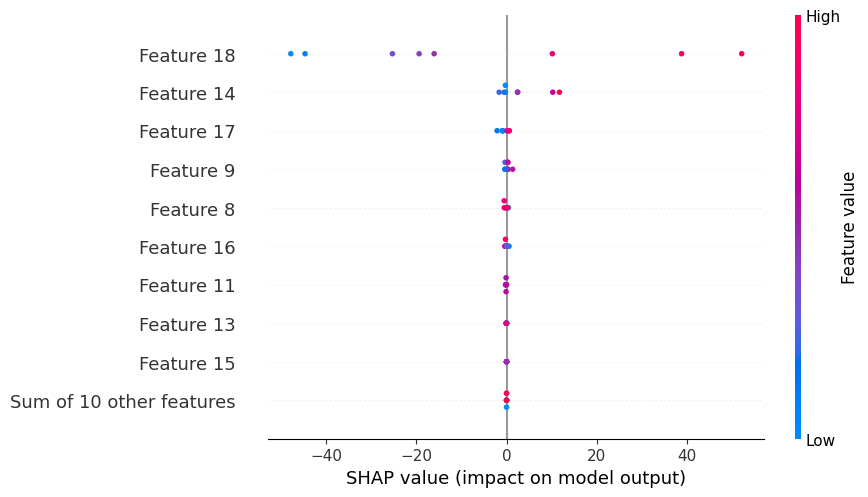

In [17]:
import shap

explainer_xgb = shap.Explainer(xgb_model, X_train)
shap_values_xgb = explainer_xgb(X_test)
shap.plots.beeswarm(shap_values_xgb)


**Zoom into individual features**

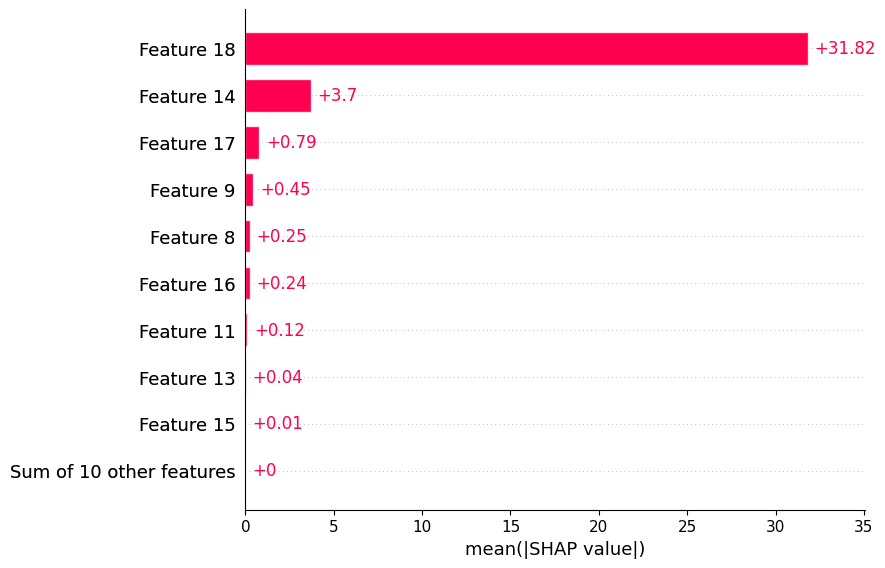

In [18]:
shap.plots.bar(shap_values_xgb)  # Cleaner bar chart version


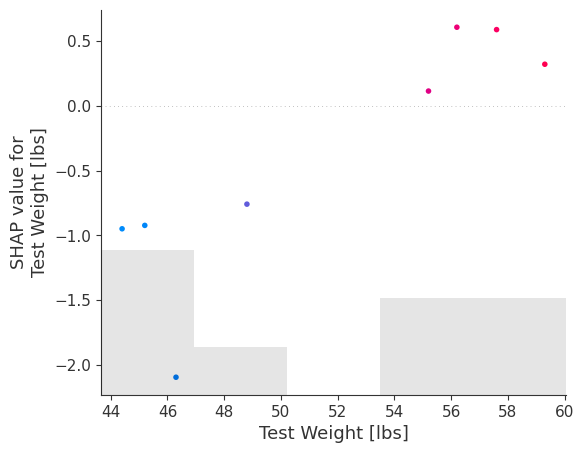

In [19]:
import shap
import pandas as pd

# Restore column names from X
column_names = X.columns.tolist()

# Convert X_test to DataFrame with correct column names
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Use SHAP Explainer
explainer_xgb = shap.Explainer(xgb_model, X_train)
shap_values_xgb = explainer_xgb(X_test_df)

# Feature-specific SHAP plot
shap.plots.scatter(shap_values_xgb[:, "Test Weight [lbs]"], color=shap_values_xgb)

# Save the plot to a file
plt.savefig('output\shap_scatter_test_weight.png', dpi=300, bbox_inches='tight')

plt.close()



Top feature: Plot Weight [lbs]


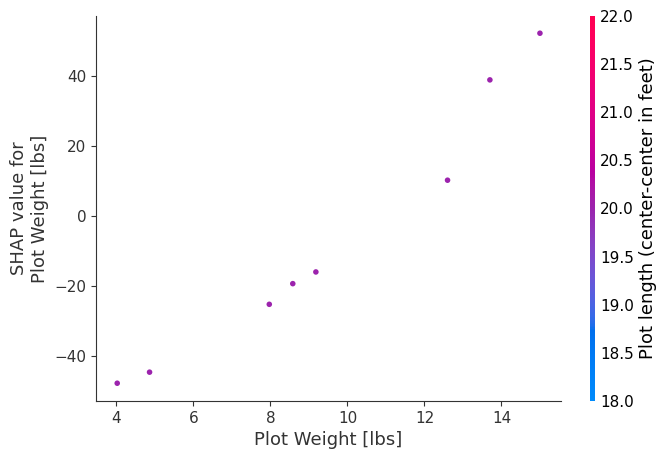

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Identify the most important feature
top_feature = X_test_df.columns[np.abs(shap_values_xgb.values).mean(0).argmax()]
print(f"Top feature: {top_feature}")

# Create and display the dependence plot
shap.dependence_plot(top_feature, shap_values_xgb.values, X_test_df, show=False)

# Save the plot
plt.savefig('shap_dependence_plot_top_feature.png', dpi=300, bbox_inches='tight')

# Display the plot inline
plt.show()


**Feature Selection based on SHAP values and retrain simpler model**


In [21]:
import pandas as pd

# Recover column names from original DataFrame X
column_names = X.columns.tolist()

# Convert X_train and X_test to DataFrames with proper column names
X_train_df = pd.DataFrame(X_train, columns=column_names)
X_test_df = pd.DataFrame(X_test, columns=column_names)

# Clean column names for compatibility (apply to full datasets first)
def clean_column_names(df):
    df.columns = (
        df.columns.str.replace(r"\[|\]", "", regex=True)  # Remove square brackets
                  .str.replace("%", "pct")               # Replace % with pct
                  .str.replace(" ", "_")                 # Replace spaces with underscores
    )
    return df

# Clean full train and test sets first
X_train_df = clean_column_names(X_train_df)
X_test_df = clean_column_names(X_test_df)

# Now define your top features with cleaned names
top_features = ['Grain_Moisture_pct', 'Plot', 'Test_Weight_lbs', 'Ear_Height_cm', 'Plot_Weight_lbs']

# Create reduced train/test sets using top features
X_train_reduced = X_train_df[top_features]
X_test_reduced = X_test_df[top_features]



In [22]:
simpler_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
simpler_model.fit(X_train_reduced, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

**Evaluate Model Performance**

In [23]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = simpler_model.predict(X_test_reduced)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Simplified Model Performance:\nR² Score: {r2:.3f}, RMSE: {rmse:.3f}")


Simplified Model Performance:
R² Score: 0.726, RMSE: 16.875


🔍 Interpretation:

✅ R² = 0.726: The model explains ~72.6% of the variance in the target variable using only 5 features. That's a strong performance, especially after feature reduction.

✅ RMSE = 16.875: The model's average prediction error is ~16.9 units (in the same unit as your target, likely grain yield or weight).

In [24]:
#Save the Simpler Model
import joblib
joblib.dump(simpler_model, 'output\simpler_xgb_model.joblib')


['C:\\Users\\gargi\\Desktop\\Publication\\Maize_project\\simpler_xgb_model.joblib']

In [26]:
import pandas as pd

# Convert list to a DataFrame or Series before saving
pd.Series(top_features, name="Top_SHAP_Features").to_csv(
    'output\top5_shap_features.csv',
    index=False
)


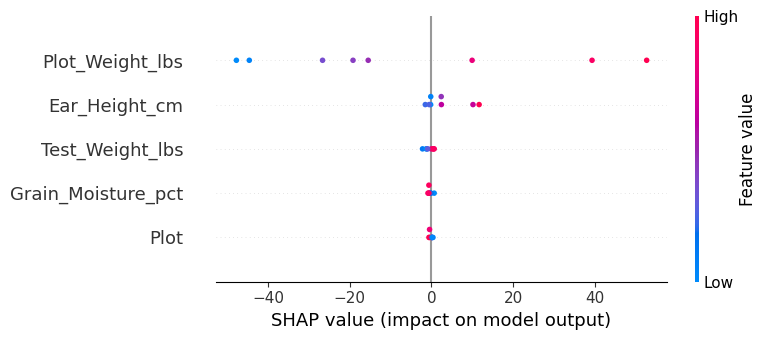

In [27]:
#Retrain SHAP for Simpler Model
explainer_simpler = shap.Explainer(simpler_model, X_train_reduced)
shap_values_simpler = explainer_simpler(X_test_reduced)
shap.summary_plot(shap_values_simpler, X_test_reduced)


## SHAP Feature Selection + Simpler Random Forest Model

**Retrain SHAP explainer using the Random Forest model**

In [28]:
from shap import TreeExplainer

# SHAP values for RandomForestRegressor
explainer_rf = TreeExplainer(r_model)  # Assuming r_model is your trained RandomForestRegressor
shap_values_rf = explainer_rf.shap_values(X_train_df)


**Identify Top N SHAP Features**

In [29]:
import numpy as np

# Mean absolute SHAP values across samples
shap_mean_rf = np.abs(shap_values_rf).mean(axis=0)

# Get top N indices
N = 5
top_indices_rf = np.argsort(shap_mean_rf)[-N:]
top_features_rf = X_train_df.columns[top_indices_rf]

print(f"Top {N} SHAP features for Random Forest:\n", top_features_rf.tolist())


Top 5 SHAP features for Random Forest:
 ['Plot', 'Test_Weight_lbs', 'Plant_Height_cm', 'Ear_Height_cm', 'Plot_Weight_lbs']


**Reduce Data to Top Features**

In [30]:
# Slice the train/test sets
X_train_reduced_rf = X_train_df[top_features_rf]
X_test_reduced_rf = X_test_df[top_features_rf]


**Retrain Simplified Random Forest Model**

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Retrain with top features
simpler_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
simpler_rf_model.fit(X_train_reduced_rf, y_train)

# Evaluate
y_pred_rf = simpler_rf_model.predict(X_test_reduced_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Simpler RandomForest Model:\nR²: {r2_rf:.3f}, RMSE: {rmse_rf:.3f}")


Simpler RandomForest Model:
R²: 0.781, RMSE: 15.091


In [32]:
#Save Model
import joblib
joblib.dump(simpler_rf_model, 'output\simpler_rf_model.joblib')

['C:\\Users\\gargi\\Desktop\\Publication\\Maize_project\\simpler_rf_model.joblib']


**SHAP Plot for Simplified RF Model**

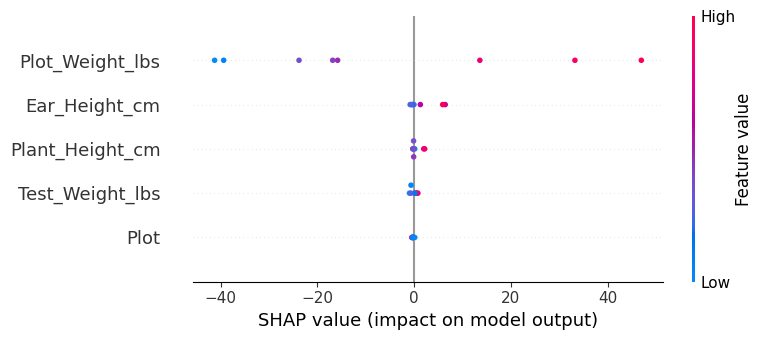

In [33]:
explainer_rf_simple = TreeExplainer(simpler_rf_model)
shap_values_rf_simple = explainer_rf_simple.shap_values(X_test_reduced_rf)

shap.summary_plot(shap_values_rf_simple, X_test_reduced_rf)


| Model                                        | RMSE            | R² Score |
| -------------------------------------------- | --------------- | -------- |
| **RandomForestRegressor (Full)**             | √216.04 ≈ 14.70 | 0.7923   |
| **XGBoost Regressor (Full)**                 | √280.55 ≈ 16.75 | 0.7302   |
| **XGBoost Simplified (Top 5 features)**      | 16.875          | 0.726    |
| **RandomForest Simplified (Top 5 features)** | 15.091          | 0.781    |



**Key takeaways:**

Full RandomForest performs best overall — highest R² and lowest RMSE.

Simplified RandomForest model closely follows with strong performance and fewer features.

Full XGBoost performs reasonably well but lags behind RandomForest.

Simplified XGBoost sees a small drop in performance compared to full XGBoost, but still respectable.


**The RandomForest model is the strongest performer for this maize phenotype prediction task.**

**Feature selection using SHAP allowed reducing feature set to top 5 without large performance loss.**

**Simplified models provide good balance between accuracy and model complexity, ideal for interpretability and deployment.**